In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from PIL import Image
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

# Importing data

In [3]:
df1 = pd.read_csv('diabetes_data_1.csv')


In [4]:
df1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Exploratory Data Analysis

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

## Checking for missing values

In [6]:
#printing null values in each column
counts = df1.isna().sum()
print(counts.sort_values())

Age                   0
Alopecia              0
muscle stiffness      0
partial paresis       0
delayed healing       0
Irritability          0
Itching               0
Obesity               0
visual blurring       0
Polyphagia            0
weakness              0
sudden weight loss    0
Polydipsia            0
Polyuria              0
Gender                0
Genital thrush        0
class                 0
dtype: int64


In [7]:
#printing number of unique values per column
print(df1.nunique())

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64


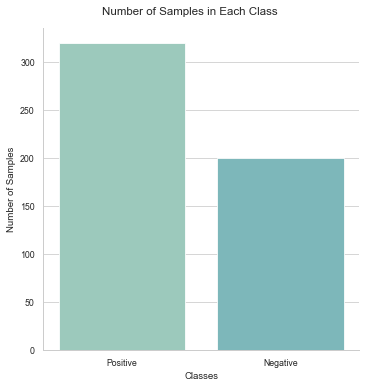

In [8]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='class', data=df1, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Classes')
plt.show()

In [9]:
#get numerical columns
num_cols = df1._get_numeric_data().columns


In [10]:
num_cols

Index(['Age'], dtype='object')

In [11]:
cols = df1.columns

In [12]:
cat_list = list(set(cols) - set(num_cols))

In [13]:
numeric_data = df1.select_dtypes(include=[np.number])
categorical_data = df1.select_dtypes(exclude=[np.number])

In [14]:
cat_list

['muscle stiffness',
 'class',
 'visual blurring',
 'Polyuria',
 'Gender',
 'partial paresis',
 'Genital thrush',
 'sudden weight loss',
 'Itching',
 'Polydipsia',
 'delayed healing',
 'Polyphagia',
 'Obesity',
 'Irritability',
 'weakness',
 'Alopecia']

In [15]:
numeric_data

,Age
0,40
1,58
2,41
3,45
4,60
...,...
515,39
516,48
517,58
518,32


In [16]:
categorical_data

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [17]:
#label encoding categorical data
categorical_data =categorical_data.apply(LabelEncoder().fit_transform)

In [18]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [19]:
categorical_data

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [20]:
#combining encoded categorical dataset and numerical dataset
final_dataset = pd.concat([categorical_data,numeric_data],axis = 1)

In [21]:
final_dataset.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,40
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,58
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,41
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,45
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,60


In [22]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Gender              520 non-null    int32
 1   Polyuria            520 non-null    int32
 2   Polydipsia          520 non-null    int32
 3   sudden weight loss  520 non-null    int32
 4   weakness            520 non-null    int32
 5   Polyphagia          520 non-null    int32
 6   Genital thrush      520 non-null    int32
 7   visual blurring     520 non-null    int32
 8   Itching             520 non-null    int32
 9   Irritability        520 non-null    int32
 10  delayed healing     520 non-null    int32
 11  partial paresis     520 non-null    int32
 12  muscle stiffness    520 non-null    int32
 13  Alopecia            520 non-null    int32
 14  Obesity             520 non-null    int32
 15  class               520 non-null    int32
 16  Age                 520 non-null    int64
dt

### Balancing the dataset using SMOTE - generating synthetic data points

In [23]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [24]:
X=final_dataset.drop('class', axis=1)
Y=final_dataset[['class']]

In [25]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

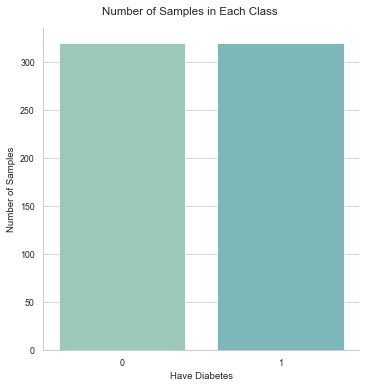

In [26]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='class', data=Y, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Have Diabetes')
plt.show()

# Splitting the data into test and train

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.2)

In [29]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 579 to 198
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Gender              512 non-null    int32
 1   Polyuria            512 non-null    int32
 2   Polydipsia          512 non-null    int32
 3   sudden weight loss  512 non-null    int32
 4   weakness            512 non-null    int32
 5   Polyphagia          512 non-null    int32
 6   Genital thrush      512 non-null    int32
 7   visual blurring     512 non-null    int32
 8   Itching             512 non-null    int32
 9   Irritability        512 non-null    int32
 10  delayed healing     512 non-null    int32
 11  partial paresis     512 non-null    int32
 12  muscle stiffness    512 non-null    int32
 13  Alopecia            512 non-null    int32
 14  Obesity             512 non-null    int32
 15  Age                 512 non-null    int64
dtypes: int32(15), int64(1)
memory usage: 38.0 

In [30]:
Ytrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 579 to 198
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   512 non-null    int32
dtypes: int32(1)
memory usage: 6.0 KB


In [31]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 294 to 546
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Gender              128 non-null    int32
 1   Polyuria            128 non-null    int32
 2   Polydipsia          128 non-null    int32
 3   sudden weight loss  128 non-null    int32
 4   weakness            128 non-null    int32
 5   Polyphagia          128 non-null    int32
 6   Genital thrush      128 non-null    int32
 7   visual blurring     128 non-null    int32
 8   Itching             128 non-null    int32
 9   Irritability        128 non-null    int32
 10  delayed healing     128 non-null    int32
 11  partial paresis     128 non-null    int32
 12  muscle stiffness    128 non-null    int32
 13  Alopecia            128 non-null    int32
 14  Obesity             128 non-null    int32
 15  Age                 128 non-null    int64
dtypes: int32(15), int64(1)
memory usage: 9.5 K

In [32]:
Ytest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 294 to 546
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   128 non-null    int32
dtypes: int32(1)
memory usage: 1.5 KB


# Building a KNN Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# creating empty list variable 
acc = []

In [36]:
# running KNN algorithm for 2 to 30 nearest neighbours and 
# storing the accuracy values 
 
for i in range(2,30,1):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(Xtrain,np.ravel(Ytrain))
    train_acc = np.mean(neigh.predict(Xtrain)==np.ravel(Ytrain))
    test_acc = np.mean(neigh.predict(Xtest)==np.ravel(Ytest))
    acc.append([train_acc,test_acc])

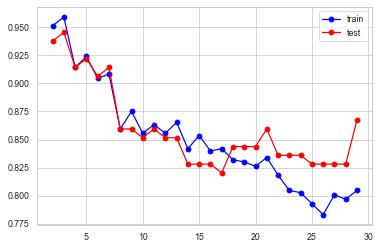

In [37]:
# train accuracy plot 
plt.plot(np.arange(2,30,1),[i[0] for i in acc],"bo-")
# test accuracy plot
plt.plot(np.arange(2,30,1),[i[1] for i in acc],"ro-")

plt.legend(["train","test"])

**Choosing K= 3 for optimum validation accuraccy**

In [38]:
#creating a model
model = KNeighborsClassifier(n_neighbors=3)

In [39]:
#fitting the model
model.fit(Xtrain,np.ravel(Ytrain))

KNeighborsClassifier(n_neighbors=3)

In [40]:
#predicting using the model and the train data
preds = model.predict(Xtrain)

In [41]:
pd.Series(preds).value_counts()

0    267
1    245
dtype: int64

In [42]:
# Accuracy = train
np.mean(Ytrain["class"] == preds) #training accuracy of 95.67%

0.958984375

In [43]:
#predicting using the model and the validation data
preds1 = model.predict(Xtest)

In [44]:
pd.Series(preds1).value_counts()

0    71
1    57
dtype: int64

In [45]:
# Accuracy = test
np.mean(Ytest["class"] == preds1) #test accuracy of 94.53%

0.9453125

In [46]:
#precision and recall of the KNN model
# print(confusion_matrix(Ytest, preds1))
print(classification_report(Ytest, preds1))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        68
           1       0.96      0.92      0.94        60

    accuracy                           0.95       128
   macro avg       0.95      0.94      0.94       128
weighted avg       0.95      0.95      0.95       128



### Saving the KNN model as a pickle file in the project directory

In [47]:
import pickle

In [56]:
pickle.dump(model, open('knn_model.pkl','wb'))

# Building a Random Forest Model

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [50]:
#fitting the model
rf_model.fit(Xtrain,np.ravel(Ytrain))

RandomForestClassifier()

In [51]:
#predicting using the model and the train data
preds = rf_model.predict(Xtrain)

In [52]:
# Accuracy = train
np.mean(Ytrain["class"] == preds) #training accuracy of 100.00%

1.0

In [53]:
#predicting using the model and the validation data
preds1 = rf_model.predict(Xtest)

In [54]:
# Accuracy = test
np.mean(Ytest["class"] == preds1) #test accuracy of 99.21%

0.9921875

In [55]:
#precision and recall of the random forest model
# print(confusion_matrix(Ytest, preds1))
print(classification_report(Ytest, preds1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.98      0.99        60

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



# Saving the random forest model as a pickle file in our directory

In [57]:
pickle.dump(rf_model, open('random_forest_model.pkl','wb'))

### Since the validation accuracy of the random forest model is greater than the KNN model, we choose the random forest model as our final model for live prediction



---





---


